In [5]:
import pandas as pd
df = pd.read_excel ('flying-fox-monitoring-2003-15.xlsx')
print(df['latitude'])

0      -26.560163
1      -25.556000
2      -27.081615
3      -27.511200
4      -27.234900
          ...    
8236   -21.160600
8237   -26.337500
8238   -26.400669
8239   -27.544400
8240   -27.080400
Name: latitude, Length: 8241, dtype: float64


In [4]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [6]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry) 

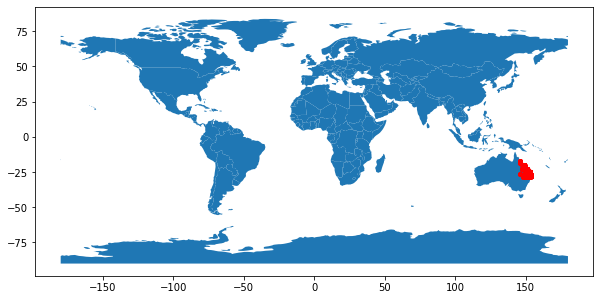

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);


Text(61.875, 0.5, 'Latitude')

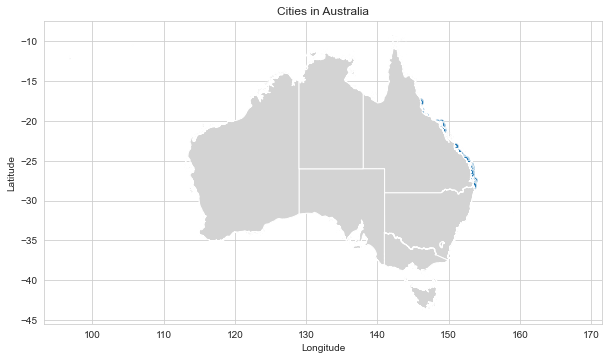

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the shapefile of Australia
australia = gpd.read_file('STE_2021_AUST_SHP_GDA2020/STE_2021_AUST_GDA2020.shp')

# Define the CRS of the shapefile manually
australia.crs = 'epsg:7844'

# Create a GeoDataFrame from the DataFrame of cities
gdf_cities = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

# Set the CRS of the GeoDataFrame to EPSG 7844
# https://epsg.io/7844
gdf_cities.crs = 'epsg:7844'

# Reproject the GeoDataFrame of cities to match the CRS of the shapefile
gdf_cities = gdf_cities.to_crs(australia.crs)

# Perform a spatial join to link the cities to their corresponding polygons in the shapefile
gdf_cities = gpd.sjoin(gdf_cities, australia, predicate='within')

# Set up the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the cities colored by priority

sns.scatterplot(ax=ax, data=gdf_cities, x=df['longitude'], y=df['latitude'])#, hue='priority', s=100, legend='full')

# Add the shapefile of Australia as a background map
australia.plot(ax=ax, color='lightgrey', edgecolor='white')

# Set the plot title and axis labels
plt.title('Cities in Australia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')